In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt 
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd # needed to preview audio file

In [2]:
# load audio
pathAudio = "./audio-files/"
audioFile='dragonball.wav' # change with the name of your audio
fullPath = pathAudio + audioFile
y, sr = librosa.load(fullPath) #you just need to make sure your audio is in the same folder in which you are coding or else you can change the path as per your requirement
print('File ' + audioFile + ' loaded.')
#ipd.Audio(fullPath)

File dragonball.wav loaded.


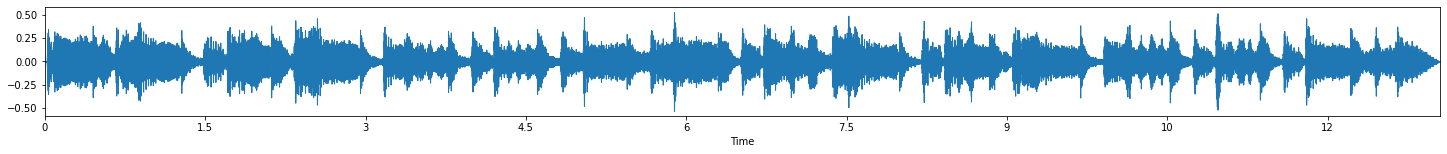

In [20]:
# good waveform
plt.figure(figsize=(25, 2))
librosa.display.waveplot(y, sr=sr)

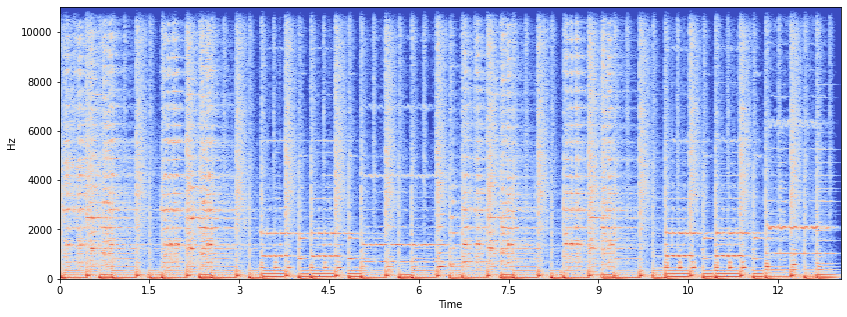

In [21]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [22]:
# less good waveform
#time = np.arange(0,len(y))/sr
#fig, ax = plt.subplots(figsize=(25,2))
#ax.plot(time,y)
#ax.set(xlabel='Time(s)',ylabel='sound amplitude')
#plt.show()

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

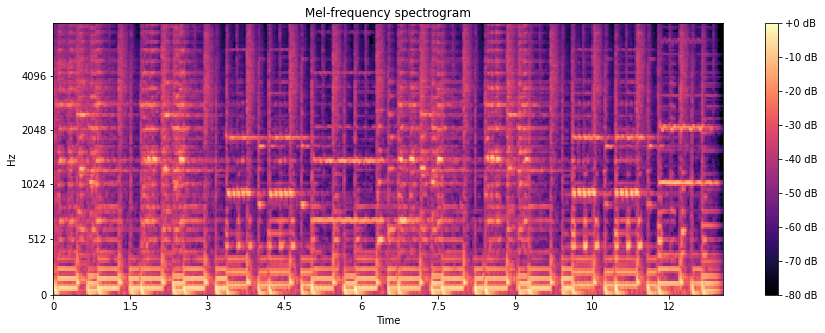

In [23]:
# Mel Spectogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
fig, ax = plt.subplots(figsize=(15,5))
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

[Text(0.5, 1.0, 'Chromagram')]

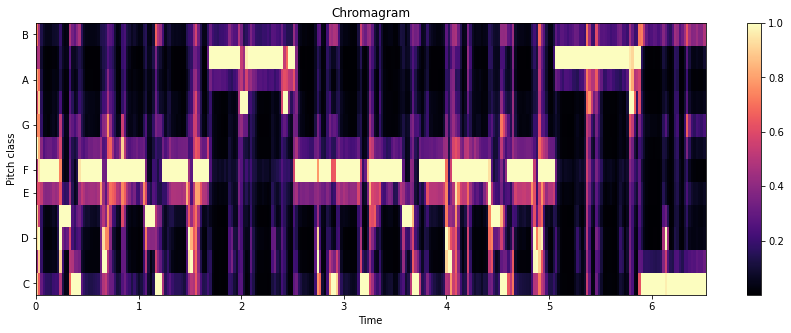

In [24]:
S = np.abs(librosa.stft(y, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)

fig, ax = plt.subplots(figsize=(15,5))
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

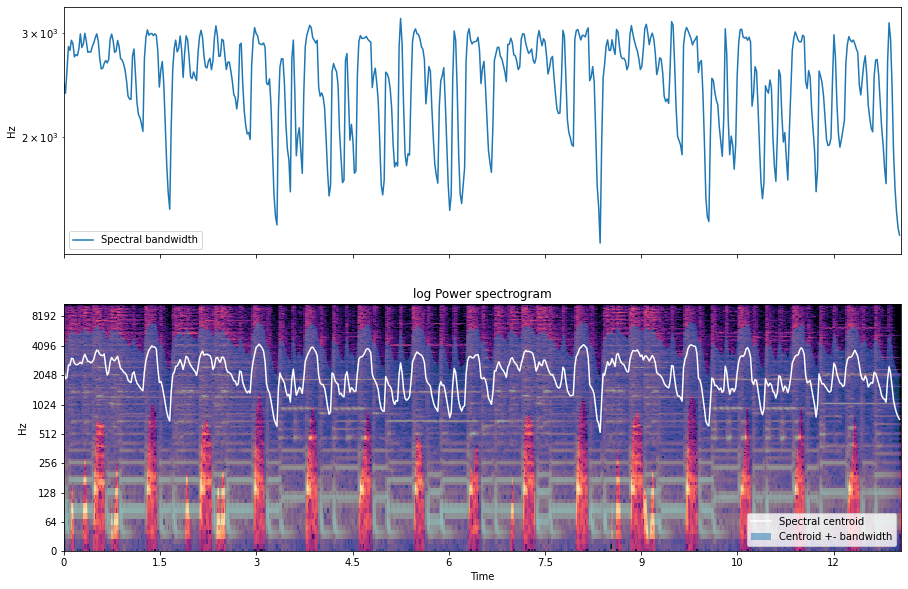

In [36]:
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
S, phase = librosa.magphase(librosa.stft(y=y))
#librosa.feature.spectral_bandwidth(S=S)
freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
#librosa.feature.spectral_bandwidth(S=np.abs(D), freq=freqs)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15,10))
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, centroid[0] - spec_bw[0], centroid[0] + spec_bw[0], alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

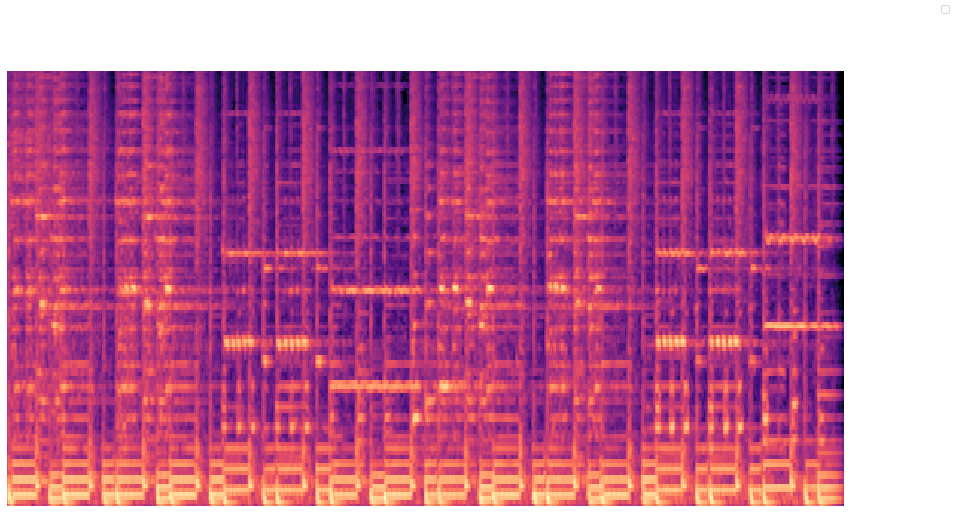

In [33]:
# NO LEGEND, AXIS AND TITLE
# Mel Spectogram

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
fig, ax = plt.subplots(figsize=(15,8))
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)
#fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.axis('off')
fig.legend('')
#ax.set(title='Mel-frequency spectrogram')

Text(0.5, 1.0, 'Mel-frequency spectrogram\n')

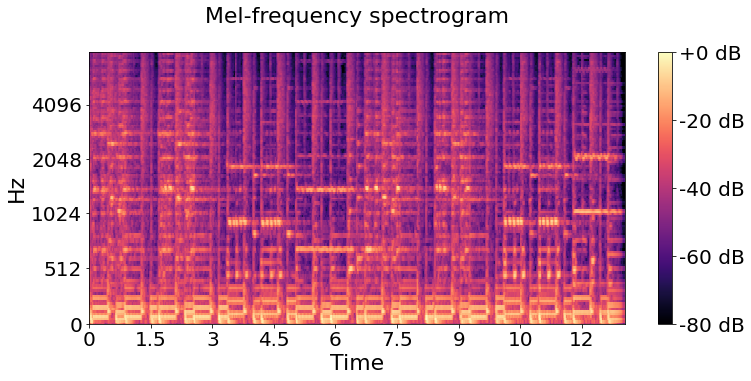

In [14]:
# Mel Spectogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
fig, ax = plt.subplots(figsize=(12,5))
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)
cbar = fig.colorbar(img, ax=ax, format='%+2.0f dB')
cbar.ax.tick_params(labelsize=20)
ax.set_xlabel("Time", fontsize=22)
ax.set_ylabel("Hz", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_title('Mel-frequency spectrogram\n', fontsize=22)